In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import traces
from datetime import datetime
from datetime import timedelta
import seaborn as sns

/Users/benshui/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/benshui/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df_liq = pd.read_csv('./Data/Liquidity Feb 24 PEPE_WETH.csv')
df_ochlv = pd.read_csv('./Data/OHLCV Minutely Feb 24 PEPE_WETH.csv')

In [3]:
df_liq.head()

,BLOCKCHAINID,PROTOCOL,DATE,BASEADDRESS,PAIR,LOGINDEX,EXCHANGEID,QUOTEADDRESS,LIQUIDITYPRICE,EXCHANGENAME,PAIRADDRESS,TIMESTAMPNANOSECONDS,AMOUNT,TIMESTAMP,TRANSACTIONHASH,TRANSACTIONINDEX,PAIRNORMALIZED,ADDRESS
0,ethereum-mainnet,0x1f98431c8ad98523631ae4a59f267346ea31f984,2024-02-01,0x6982508145454ce325ddbe47a25d4ec3d2311933,PEPE_WETH,70,0x1f98431c8ad98523631ae4a59f267346ea31f984,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,4.014215e-10,uniswapv3,0x11950d141ecb863f01007add7d1a342041227b58,1970-01-01 00:00:00.000 Z,1.525004e+12,2024-02-01 05:33:35.000 Z,0xbdd921ae798df867f06b90ff81d13c5d89385cdd7853...,10,pepe_weth,0x6982508145454ce325ddbe47a25d4ec3d2311933
1,ethereum-mainnet,0x1f98431c8ad98523631ae4a59f267346ea31f984,2024-02-01,0x6982508145454ce325ddbe47a25d4ec3d2311933,PEPE_WETH,56,0x1f98431c8ad98523631ae4a59f267346ea31f984,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,3.994265e-10,uniswapv3,0x11950d141ecb863f01007add7d1a342041227b58,1970-01-01 00:00:00.000 Z,1.507479e+12,2024-02-01 10:28:35.000 Z,0x5600c4637ec548b70c5b02e8e4578683d336f8a0492b...,6,pepe_weth,0x6982508145454ce325ddbe47a25d4ec3d2311933
2,ethereum-mainnet,0x1f98431c8ad98523631ae4a59f267346ea31f984,2024-02-01,0x6982508145454ce325ddbe47a25d4ec3d2311933,PEPE_WETH,58,0x1f98431c8ad98523631ae4a59f267346ea31f984,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,3.950221e-10,uniswapv3,0x11950d141ecb863f01007add7d1a342041227b58,1970-01-01 00:00:00.000 Z,1.588533e+12,2024-02-01 01:55:23.000 Z,0x70387887155a86ba6c02abe58449f0e801d2fbea6a1f...,8,pepe_weth,0x6982508145454ce325ddbe47a25d4ec3d2311933
3,ethereum-mainnet,0x1f98431c8ad98523631ae4a59f267346ea31f984,2024-02-01,0x6982508145454ce325ddbe47a25d4ec3d2311933,PEPE_WETH,58,0x1f98431c8ad98523631ae4a59f267346ea31f984,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2.531504e+09,uniswapv3,0x11950d141ecb863f01007add7d1a342041227b58,1970-01-01 00:00:00.000 Z,1.399777e+02,2024-02-01 01:55:23.000 Z,0x70387887155a86ba6c02abe58449f0e801d2fbea6a1f...,8,pepe_weth,0x6982508145454ce325ddbe47a25d4ec3d2311933
4,ethereum-mainnet,0x1f98431c8ad98523631ae4a59f267346ea31f984,2024-02-01,0x6982508145454ce325ddbe47a25d4ec3d2311933,PEPE_WETH,63,0x1f98431c8ad98523631ae4a59f267346ea31f984,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,2.501487e+09,uniswapv3,0x11950d141ecb863f01007add7d1a342041227b58,1970-01-01 00:00:00.000 Z,1.521494e+02,2024-02-01 11:04:47.000 Z,0x617ca2fd736e09e8564e2c62faf3b54137b32e376781...,13,pepe_weth,0x6982508145454ce325ddbe47a25d4ec3d2311933


In [4]:
df_liq_sub = df_liq[['TIMESTAMP', 'TRANSACTIONHASH', 'LIQUIDITYPRICE', 'AMOUNT']]

In [5]:
df_liq_sub['FLAG'] = (df_liq_sub['LIQUIDITYPRICE']>1).astype(int)

/var/folders/48/1rvc22rd6jd0__b5ksw4k3340000gn/T/ipykernel_21691/3529883324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_liq_sub['FLAG'] = (df_liq_sub['LIQUIDITYPRICE']>1).astype(int)


In [6]:
df_liq_sub

,TIMESTAMP,TRANSACTIONHASH,LIQUIDITYPRICE,AMOUNT,FLAG
0,2024-02-01 05:33:35.000 Z,0xbdd921ae798df867f06b90ff81d13c5d89385cdd7853...,4.014215e-10,1.525004e+12,0
1,2024-02-01 10:28:35.000 Z,0x5600c4637ec548b70c5b02e8e4578683d336f8a0492b...,3.994265e-10,1.507479e+12,0
2,2024-02-01 01:55:23.000 Z,0x70387887155a86ba6c02abe58449f0e801d2fbea6a1f...,3.950221e-10,1.588533e+12,0
3,2024-02-01 01:55:23.000 Z,0x70387887155a86ba6c02abe58449f0e801d2fbea6a1f...,2.531504e+09,1.399777e+02,1
4,2024-02-01 11:04:47.000 Z,0x617ca2fd736e09e8564e2c62faf3b54137b32e376781...,2.501487e+09,1.521494e+02,1
...,...,...,...,...,...
25753,2024-02-29 16:06:47.000 Z,0x40802c3d621ecba63fd08ccd792041e2238d47bbef83...,1.175178e+09,5.347601e+02,1
25754,2024-02-29 23:59:11.000 Z,0x988376a6acaaf1fafb6b1e182bedcec6140a4602fcd1...,8.176682e-10,7.994998e+11,0
25755,2024-02-29 00:17:59.000 Z,0xd6ca5349b78d526b55d6e3e1018700c91f5af67c8f1c...,9.017074e-10,5.050333e+11,0
25756,2024-02-29 02:11:59.000 Z,0x354884119ab9ccc41471412a7d20176f0652093e578c...,1.122722e+09,5.804841e+02,1


In [7]:
df_liq_weth = df_liq_sub.loc[df_liq_sub['FLAG']==1, :].copy()
df_liq_pepe = df_liq_sub.loc[df_liq_sub['FLAG']==0, :].copy()

In [8]:
df_liq_new = pd.merge(df_liq_weth, df_liq_pepe, on = 'TRANSACTIONHASH', suffixes = ('_weth', '_pepe'))

In [9]:
df_liq_new.head()

,TIMESTAMP_weth,TRANSACTIONHASH,LIQUIDITYPRICE_weth,AMOUNT_weth,FLAG_weth,TIMESTAMP_pepe,LIQUIDITYPRICE_pepe,AMOUNT_pepe,FLAG_pepe
0,2024-02-01 01:55:23.000 Z,0x70387887155a86ba6c02abe58449f0e801d2fbea6a1f...,2.531504e+09,139.977737,1,2024-02-01 01:55:23.000 Z,3.950221e-10,1.588533e+12,0
1,2024-02-01 11:04:47.000 Z,0x617ca2fd736e09e8564e2c62faf3b54137b32e376781...,2.501487e+09,152.149383,1,2024-02-01 11:04:47.000 Z,3.997621e-10,1.512708e+12,0
2,2024-02-01 02:17:35.000 Z,0x74b22819e6b7523061bd5ff42526f6e6094a9caff54b...,2.498761e+09,166.170101,1,2024-02-01 02:17:35.000 Z,4.001983e-10,1.523029e+12,0
3,2024-02-01 01:57:47.000 Z,0x6f8eec56dd210c2492c379f52026c85cb6accbad3492...,2.525571e+09,144.267905,1,2024-02-01 01:57:47.000 Z,3.959499e-10,1.577741e+12,0
4,2024-02-01 08:48:59.000 Z,0xed38df5dd47e11c8a41c043bf3ff12ecae0ee49bb366...,2.499912e+09,164.432680,1,2024-02-01 08:48:59.000 Z,4.000140e-10,1.522751e+12,0


In [10]:
df_liq_new = df_liq_new[['TIMESTAMP_weth', 'TRANSACTIONHASH', 'LIQUIDITYPRICE_pepe', 'AMOUNT_weth', 'AMOUNT_pepe']]

In [11]:
df_liq_new = df_liq_new.rename(columns = {'TIMESTAMP_weth': 'TIMESTAMP'})

In [12]:
df_liq_new['TIMESTAMP'] = pd.to_datetime(df_liq_new['TIMESTAMP']).dt.tz_convert(None)

In [13]:
df_ochlv['TIMESTAMP'] = pd.to_datetime(df_ochlv['TIMESTAMP']).dt.tz_convert(None)

In [14]:
df_liq_new.set_index('TIMESTAMP', inplace = True)
df_ochlv.set_index('TIMESTAMP', inplace = True)

In [15]:
df_liq_resample = df_liq_new.resample('min').last().dropna()

In [16]:
df = pd.merge(df_ochlv, df_liq_resample, left_index=True, right_index = True, how='left')

In [17]:
df = df[['OPEN', 'CLOSE', 'HIGH', 'LOW', 'VOLUME', 'LIQUIDITYPRICE_pepe', 'AMOUNT_weth', 'AMOUNT_pepe']]

In [18]:
df['label'] = (df['CLOSE'].shift(-1)>df['CLOSE']).astype(int)

In [19]:
df

,OPEN,CLOSE,HIGH,LOW,VOLUME,LIQUIDITYPRICE_pepe,AMOUNT_weth,AMOUNT_pepe,label
TIMESTAMP,,,,,,,,,
2024-02-01 00:00:00,3.978584e-10,3.978584e-10,3.978584e-10,3.978584e-10,6.808443e+07,3.990583e-10,145.791960,1.528933e+12,0
2024-02-01 00:06:00,3.978407e-10,3.970205e-10,3.978407e-10,3.970205e-10,4.109404e+10,3.982163e-10,141.658678,1.539333e+12,1
2024-02-01 00:07:00,3.994143e-10,3.997212e-10,3.997212e-10,3.994143e-10,7.569847e+09,3.982180e-10,144.684491,1.531763e+12,0
2024-02-01 00:12:00,3.976006e-10,3.976006e-10,3.976006e-10,3.976006e-10,7.231979e+08,3.988261e-10,144.396947,1.532486e+12,1
2024-02-01 00:15:00,3.975638e-10,4.003369e-10,4.003369e-10,3.975638e-10,2.041226e+10,3.987523e-10,148.112522,1.523206e+12,1
...,...,...,...,...,...,...,...,...,...
2024-02-28 23:55:00,9.563748e-10,9.516747e-10,9.683037e-10,9.516747e-10,3.869212e+10,9.652678e-10,606.012321,4.894199e+11,0
2024-02-28 23:56:00,9.386648e-10,9.386648e-10,9.386648e-10,9.386648e-10,2.696107e+09,9.441209e-10,603.481581,4.921160e+11,1
2024-02-28 23:57:00,9.418610e-10,9.420802e-10,9.420802e-10,9.418610e-10,2.243702e+08,9.392059e-10,603.692917,4.918916e+11,0


In [20]:
df.to_csv('new_merged.csv')

In [21]:
td_list = (df.index.diff().dropna()/pd.Timedelta(minutes=1)).to_list()

In [22]:
td = np.array(td_list)

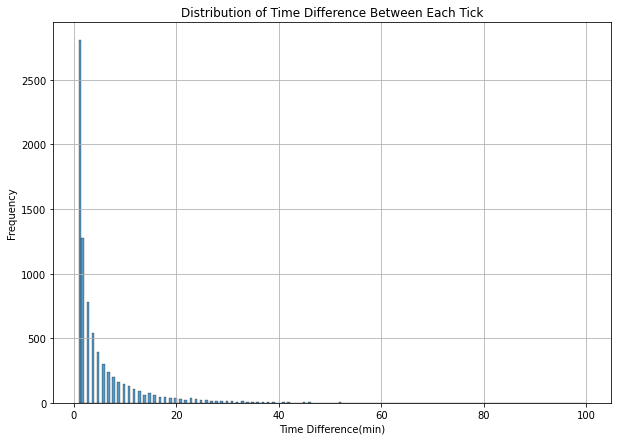

In [24]:
fig, ax = plt.subplots(figsize = (10,7))
sns.histplot(td, ax=ax)
plt.title("Distribution of Time Difference Between Each Tick")
plt.xlabel("Time Difference(min)")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig("time_difference_distribution.png", dpi=600)